In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# read csv file into pandas
df = pd.read_csv("quest9.csv")
df.head(20)

,question_id,student_answer,score
0,9,ادرس,0
1,9,اقرأ,2
2,9,اية : اقرا باسم ربك الذي خلق ...,2
3,9,اقرأ,2
4,9,الآية: إقرأ باسم ربك الذي خلق,2
5,9,تعلم,0
6,9,العب,0
7,9,إقرأ,2
8,9,اقرا بداية سورة العلق,2
9,9,اقرا بسم ربك الذي خلق,2


In [2]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     107 non-null    int64 
 1   student_answer  107 non-null    object
 2   score           107 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


In [3]:
df.groupby('score').size()

score
0    27
2    80
dtype: int64

In [4]:
df.duplicated().sum()

65

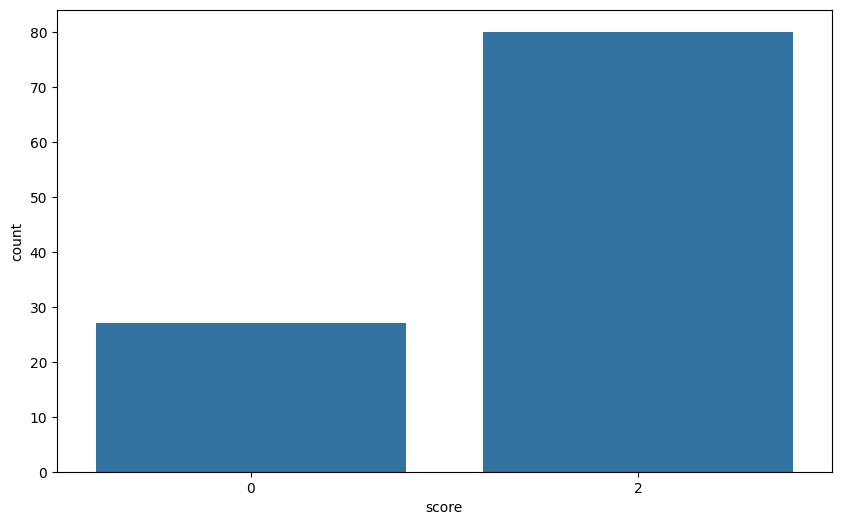

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='score')
plt.show()

In [7]:
import pandas as pd
df = pd.read_csv('./quest9.csv')
df1 = pd.DataFrame.drop_duplicates(df)
df2 = pd.DataFrame(df1)
df2['score'] = df2['score'].apply(lambda x : int(x * 2.5 ))
csv = './question9.csv'
df2.to_csv(csv,index=False)
print(len(df1))

42


In [9]:
df = pd.read_csv("question9.csv")
df.head(20)

,question_id,student_answer,score
0,9,ادرس,0
1,9,اقرأ,5
2,9,اية : اقرا باسم ربك الذي خلق ...,5
3,9,اقرأ,5
4,9,الآية: إقرأ باسم ربك الذي خلق,5
5,9,تعلم,0
6,9,العب,0
7,9,إقرأ,5
8,9,اقرا بداية سورة العلق,5
9,9,اقرا بسم ربك الذي خلق,5


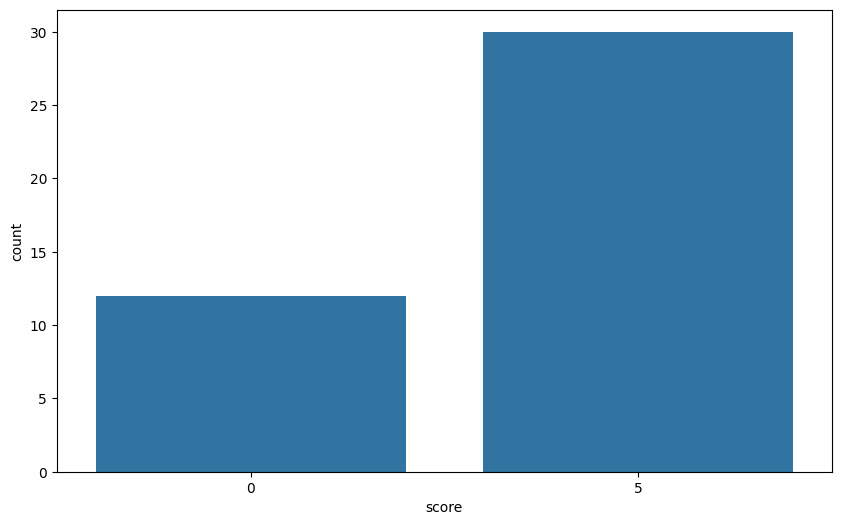

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='score')
plt.show()

In [11]:
def txt_preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    return tokens

In [12]:
import nltk
from nltk.tokenize import word_tokenize

In [13]:
df['tokens'] = df['student_answer'].apply(txt_preprocess)

In [14]:
from gensim.models import Word2Vec

In [15]:
model_word2vec = Word2Vec(df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

In [16]:
def get_word_vector(tokens, model_word2vec):
    textvector = np.zeros((100,), dtype='float32')
    for token in tokens:
        try:
            textvector += model_word2vec.wv[token]
        except KeyError:
            continue
    return textvector


df['textvector'] = df['tokens'].apply(lambda x: get_word_vector(x, model_word2vec))

In [17]:
df.head(5)

,question_id,student_answer,score,tokens,textvector
0,9,ادرس,0,[ادرس],"[-0.008216973, 0.00016809226, 0.0060254214, 0...."
1,9,اقرأ,5,[اقرأ],"[-0.00824321, 0.009317375, -0.00019950318, -0...."
2,9,اية : اقرا باسم ربك الذي خلق ...,5,"[اية, :, اقرا, باسم, ربك, الذي, خلق, ...]","[-0.025258575, 0.008632954, 0.015474832, 0.005..."
3,9,اقرأ,5,[اقرأ],"[-0.00824321, 0.009317375, -0.00019950318, -0...."
4,9,الآية: إقرأ باسم ربك الذي خلق,5,"[الآية, :, إقرأ, باسم, ربك, الذي, خلق]","[-0.013525218, 0.015152673, 0.000333915, 0.012..."
